In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import keras
from keras.preprocessing.image import *
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import *

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_path = "/content/drive/MyDrive/maskdata/train"
test_path = "/content/drive/MyDrive/maskdata/test"

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    image_size = (256,256),
    batch_size = 32
)


Found 616 files belonging to 2 classes.


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size = (256,256),
    batch_size = 32
)

Found 198 files belonging to 2 classes.


In [ ]:
# TRY MODIFYING THIS FOR DATA AUGUMENTATION TO PREVENT OVERFITTING

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    horizontal_flip  = True,
    rotation_range = 40,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    class_mode = 'binary',
    target_size = (256, 256)
)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    class_mode = 'binary',
    target_size = (256, 256)
)

valid_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    class_mode = 'binary',
    target_size = (256, 256)
)

NameError: ignored

Epoch 1/30
20/20 [==============================] - 533s 17s/step - loss: 21.9931 - accuracy: 0.8192 - val_loss: 0.4194 - val_accuracy: 0.9545
Epoch 2/30
20/20 [==============================] - 4s 175ms/step - loss: 0.3083 - accuracy: 0.9871 - val_loss: 1.2726 - val_accuracy: 0.9040
Epoch 3/30
20/20 [==============================] - 4s 175ms/step - loss: 0.0242 - accuracy: 0.9952 - val_loss: 0.0092 - val_accuracy: 0.9949
Epoch 4/30
20/20 [==============================] - 4s 178ms/step - loss: 7.9456e-05 - accuracy: 1.0000 - val_loss: 0.1992 - val_accuracy: 0.9798
Epoch 5/30
20/20 [==============================] - 4s 177ms/step - loss: 8.0061e-05 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9949
Epoch 6/30
20/20 [==============================] - 4s 179ms/step - loss: 0.0862 - accuracy: 0.9914 - val_loss: 0.0345 - val_accuracy: 0.9899
Epoch 7/30
20/20 [==============================] - 4s 176ms/step - loss: 0.1615 - accuracy: 0.9968 - val_loss: 0.0857 - val_accuracy: 0.98

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Epoch 1/30
20/20 [==============================] - 5s 195ms/step - loss: 5.5845e-04 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9899
Epoch 2/30
20/20 [==============================] - 4s 185ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9949
Epoch 3/30
20/20 [==============================] - 4s 184ms/step - loss: 274.8803 - accuracy: 0.9314 - val_loss: 36.3669 - val_accuracy: 0.3333
Epoch 4/30
20/20 [==============================] - 4s 185ms/step - loss: 7.4464 - accuracy: 0.5510 - val_loss: 0.6973 - val_accuracy: 0.3333
Epoch 5/30
20/20 [==============================] - 4s 186ms/step - loss: 1.0273 - accuracy: 0.5370 - val_loss: 0.6297 - val_accuracy: 0.3333
Epoch 6/30
20/20 [==============================] - 4s 184ms/step - loss: 3.8097 - accuracy: 0.6054 - val_loss: 0.4232 - val_accuracy: 0.7273
Epoch 7/30
20/20 [==============================] - 4s 187ms/step - loss: 1.3060 - accuracy: 0.8921 - val_loss: 0.1926 - val_accuracy: 0.9545

No handles with labels found to put in legend.
No handles with labels found to put in legend.


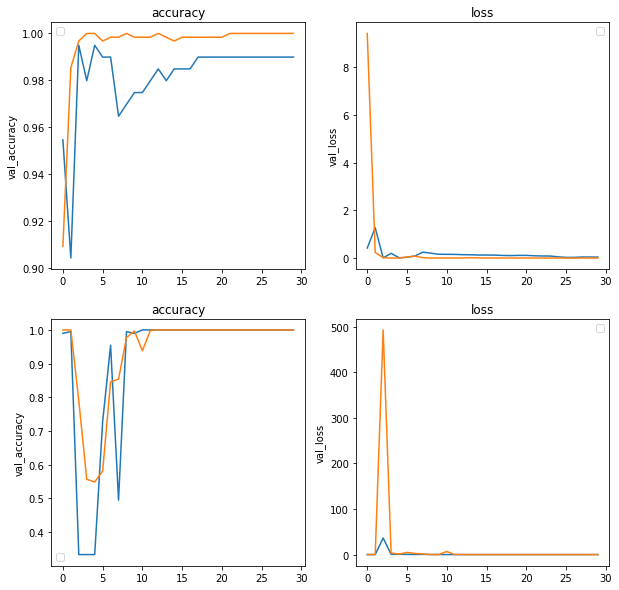

In [ ]:
import tensorflow as tf

def scheduler(epoch, lr):
    if epoch < 15:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callbacks = [
#     EarlyStopping(monitor = 'val_accuracy', patience = 5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001),
    ModelCheckpoint(filepath='weights.h5', save_weights_only=True, monitor='val_accuracy',mode='max', save_best_only=True),
    LearningRateScheduler(scheduler),
    
]


from keras.applications import VGG16

VGG =  VGG16(weights = 'imagenet', include_top = False, input_shape = (256, 256, 3))

VGG.trainable = False

model = Sequential()
model.add(VGG)

model.add(Flatten())

model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(
    train_dataset,
    batch_size = 32,
    epochs = 30,
    validation_data = test_dataset,
    callbacks = callbacks
         )

plt.figure(figsize = (10, 10))
plt.subplot(2,2, 1)
plt.title('accuracy')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'val_accuracy')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'accuracy')
plt.legend()

plt.subplot(2,2, 2)
plt.title('loss')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'val_loss')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'loss')
plt.legend()

VGG.trainable = True
set_trainable = False

for layer in VGG.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(
    train_dataset,
    batch_size = 32,
    epochs = 30,
    validation_data = test_dataset,
    callbacks = callbacks
         )

plt.subplot(2,2, 3)
plt.title('accuracy')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'val_accuracy')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'accuracy')
plt.legend()

plt.subplot(2,2, 4)
plt.title('loss')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'val_loss')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'loss')
plt.legend()


In [ ]:
model.save('facemask-model1.h5')